# Implementation of Polynomial Regression algorithm on data about different employees within a company and their hierarchy and their salary with years of experience.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams

In [2]:
# This will give us a good resolution for our visualization
%config InlineBackend.figure_format = 'retina' 
rcParams['figure.figsize'] = 10, 10

In [3]:
# Importing the dataset and displaying it
plr = pd.read_csv('/Users/rishi/Desktop/Fall 2018/Udemy/Machine Learning/Polynomial Linear Regression/Polynomial_Regression/Position_Salaries.csv')
plr

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [27]:
X = plr.iloc[:, 1:2].values
y = plr.iloc[:, 2].values

In [28]:
X = pd.DataFrame(X)
X

,0
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [29]:
X.shape

(10, 1)

In [30]:
y = pd.DataFrame(y)
y

,0
0,45000
1,50000
2,60000
3,80000
4,110000
5,150000
6,200000
7,300000
8,500000
9,1000000


In [31]:
y.shape

(10, 1)

In [34]:
from sklearn.linear_model import LinearRegression
lin_reg1 = LinearRegression()
lin_reg1.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Here we are importing the class PolynomialFeatures which is used to create a new matrix of features called "X_poly"
### which is generated by transforming our original matrix of independent variable/feature "X".

### We are also implying the degree to the power 4.

In [56]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 5)
X_poly = poly_reg.fit_transform(X)

In [57]:
X_poly = pd.DataFrame(X_poly)
X_poly

,0,1,2,3,4,5
0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,2.0,4.0,8.0,16.0,32.0
2,1.0,3.0,9.0,27.0,81.0,243.0
3,1.0,4.0,16.0,64.0,256.0,1024.0
4,1.0,5.0,25.0,125.0,625.0,3125.0
5,1.0,6.0,36.0,216.0,1296.0,7776.0
6,1.0,7.0,49.0,343.0,2401.0,16807.0
7,1.0,8.0,64.0,512.0,4096.0,32768.0
8,1.0,9.0,81.0,729.0,6561.0,59049.0
9,1.0,10.0,100.0,1000.0,10000.0,100000.0


### Here we are creating another linear regressor which will be used to fit the new matrix of features "X_poly" with our dependent variable "y"

In [58]:
lin_reg2 = LinearRegression()
lin_reg2.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Here, we observe the prediction of salaries by our linear regression model 

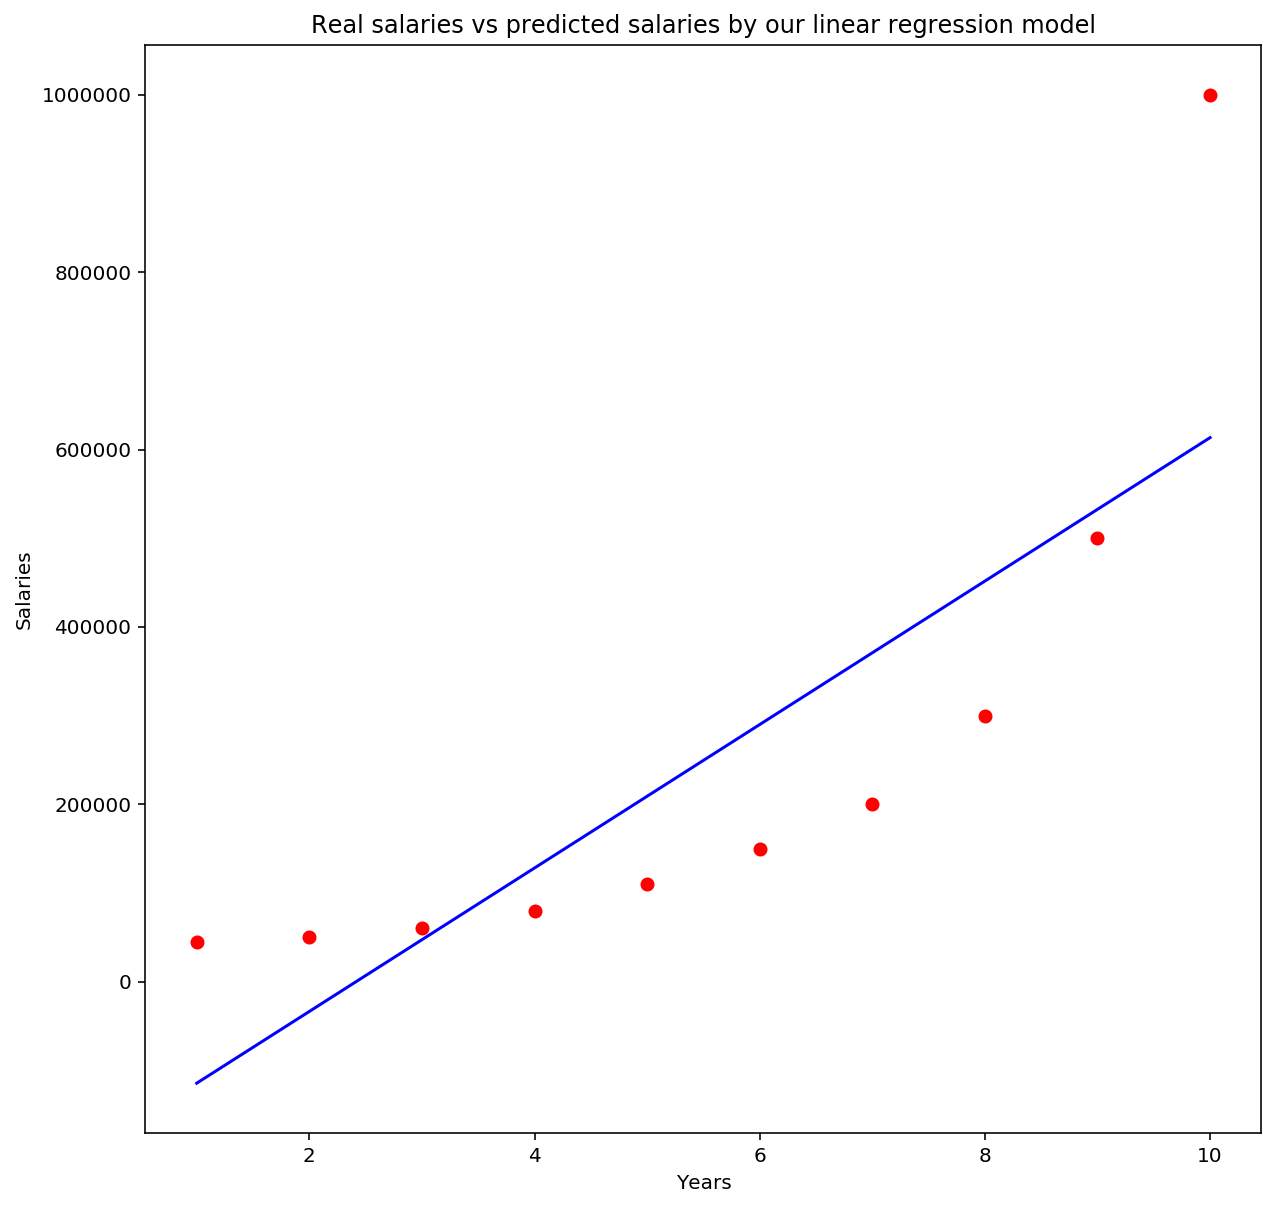

In [59]:
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg1.predict(X), color = 'blue')
plt.title('Real salaries vs predicted salaries by our linear regression model')
plt.xlabel('Years')
plt.ylabel('Salaries')
plt.show()

### Now we observe that when we plot the predection of salaries by our polynomial regression model then we get a very accurate graph

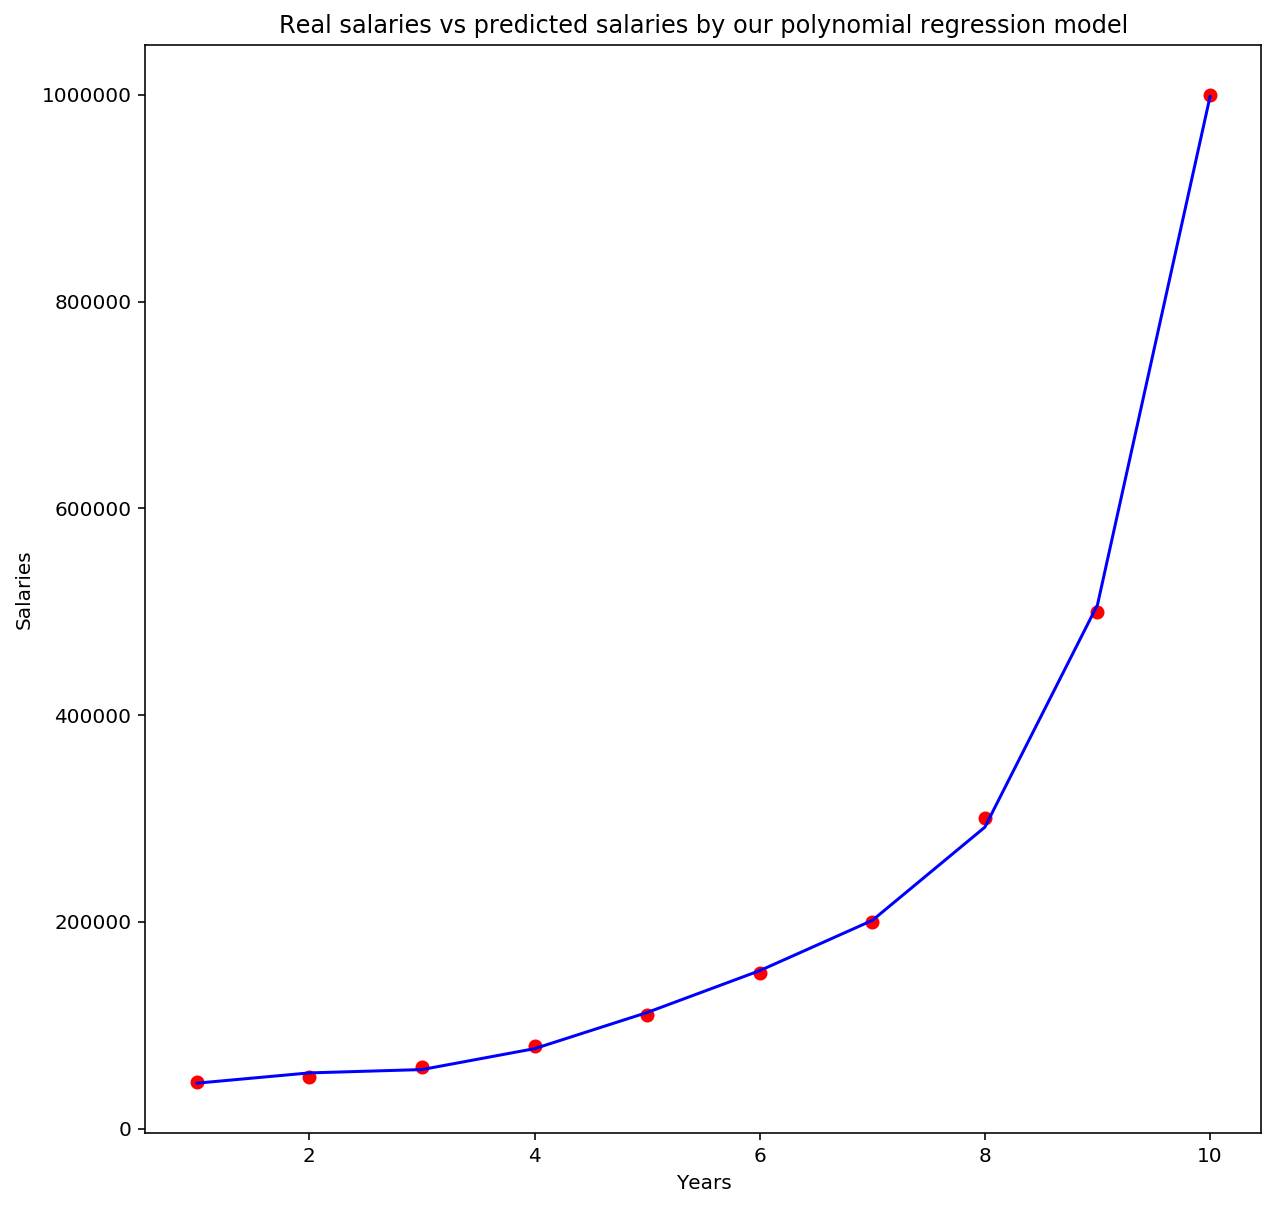

In [61]:
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg2.predict(X_poly), color = 'blue')
plt.title('Real salaries vs predicted salaries by our polynomial regression model')
plt.xlabel('Years')
plt.ylabel('Salaries')
plt.show()